<a href="https://colab.research.google.com/github/HyunLee103/Python_basic/blob/master/coding_dojang_38~40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #38 예외처리

## try except, else finally

In [0]:
def ten_div(x):
    return 10/x

In [0]:
ten_div(2)

5.0

In [0]:
try:
    x = int(input('나눌 숫자를 입력하세요: '))
    y = 10/x
    print(y)
except:
    print('예외 발생')

나눌 숫자를 입력하세요: 5
2.0


In [0]:
y = [10,20,30]

try:
    index, x = map(int, input('인덱스와 나눌 숫자 입력:').split())
    print(y[index]/x)
except ZeroDivisionError: # 숫자를 0으로 나눴을때 에러 출력
    print('0으로 나눌수 없음')

except IndexError: # 범위를 넘어선 인덱스 접근일때 에러 출력
    print('잘못된 인덱스')

인덱스와 나눌 숫자 입력:2 0
0으로 나눌수 없음


In [0]:
try:
    x = int(input('나눌 숫자 입력:'))
    y = 10/x
except ZeroDivisionError:
    print('0으로 나눌 수 없음')
else:
    print(y)

나눌 숫자 입력:2
5.0


In [0]:
try:
    x = int(input('나눌 숫자를 입력하세요:'))
    y = 10/x
except ZeroDivisionError:
    print('0으로 나눌 수 없음')
else:
    print(y)
finally:
    print('코드 실행 끝')

나눌 숫자를 입력하세요:0
0으로 나눌 수 없음
코드 실행 끝


## 예외 발생 (raise)

In [0]:
try:
    x = int(input('3의 배수 입력:'))
    if x % 3 != 0:
        raise Exception('3의 배수가 아닙니다')   # ?? Exception의 역할이 뭐지?, RuntimeError 같은것도 사용가능하다는데
    print(x)
except Exception as e:
    print('예외 발생', e)

3의 배수 입력:5
예외 발생 3의 배수가 아닙니다


In [0]:
def three_multiple():
    x = int(input('3의 배수 입력:'))
    if x%3 != 0:
        raise Exception('3의 배수 아님') # 예외 발생
    print(x)

try:
    three_multiple()
except Exception as e:   # except로 발생한 예외 처리
    print('예외 발생',e)

3의 배수 입력:5
예외 발생 3의 배수 아님


In [0]:
def three_multiple():
    try:
        x = int(input('3의 배수 입력:'))
        if x % 3 != 0:
            raise Exception('3의 배수가 아닙니다')
        print(x)
    except Exception as e:
        print('함수안에서 raise로 발생한 예외를 except로 처리.',e)
        raise # except 안에서 raise를 사용하면 현재 예외를 다시 발생시킴

try:
    three_multiple()
except Exception as e:
    print('스크립트 파일에서 예외가 발생.',e)

3의 배수 입력:5
함수안에서 raise로 발생한 예외를 except로 처리. 3의 배수가 아닙니다
스크립트 파일에서 예외가 발생. 3의 배수가 아닙니다


In [0]:
x = int(input('3의 배수 입력 :'))
assert x % 3 == 0  # assert 뒤에 조건식이 참이면 그냥 진행, 거짓이면 AssertionError 예외 발생
print(X)

3의 배수 입력 :5


AssertionError: ignored

assert는 디버깅 모드에서만 실행됩니다. 특히 파이썬은 기본적으로 디버깅 모드이며(__debug__의 값이 True) assert가 실행되지 않게 하려면 python에 -O 옵션을 붙여서 실행합니다(영문 대문자 O).

python -O 스크립트파일.py


## 사용자 정의 예외 선언하기

In [0]:
class NotThreeMultipleError(Exception):
    def __init__(self):
        super().__init__('3의 배수가 아닙니다.')


def three_multiple():
    try:
        x = int(input('3의 배수를 입력 :'))
        if x%3 != 0:
            raise NotThreeMultipleError
        print(x)
    except Exception as e:
        print('예외가 발생했습니다.',e)

three_multiple()

3의 배수를 입력 :5
예외가 발생했습니다. 3의 배수가 아닙니다.


## practice
https://dojang.io/mod/quiz/attempt.php?attempt=918213&cmid=2404

사용자 정의 에러를 만들고 싶을때는 Exception class를 상속 받아서 class를 재정의 해줘야 한다.

In [0]:
class NotPalindromeError(Exception):
    def __init__(self):
        super().__init__('회문이 아닙니다.')  # super() : base class의 method와 attribute를 sub class에서 오버라이딩 하고 싶을 때 사용

def palindrome(word):
    
    for i in range(len(word)):
        if word[i] != word[-(i+1)]:
            raise NotPalindromeError
    print(word)

In [0]:
try:
    word = input()
    palindrome(word)
    
except NotPalindromeError as e:
    print(e)

hello
회문이 아닙니다.


# #39 Iterator

## iterable : 반복 가능 객체
문자열, 리스트, 딕셔너리, set 

In [0]:
# dir() : 객체의 method 확인
dir([1,2,5]) 

In [0]:
a = [1,2,5].__iter__()  # 리스트 [1,2,5] (리스트도 class, 객체이다)의 method __iter__를 호출하면 iterator가 생성된다
                        # 그 iterator를 a에 할당하고
a.__next__()            # a(iterator)에서 __next__를 호출하면 리스트 요소값을 순서대로 꺼내옴
a.__next__()

# 여기서 list를 ins

2

In [0]:
it = range(3).__iter__()

it.__next__()

0

**for i in (iterator)**  
for 문은 __iter__와 __next__ method를 밑에 그림과 같이 수행해준다




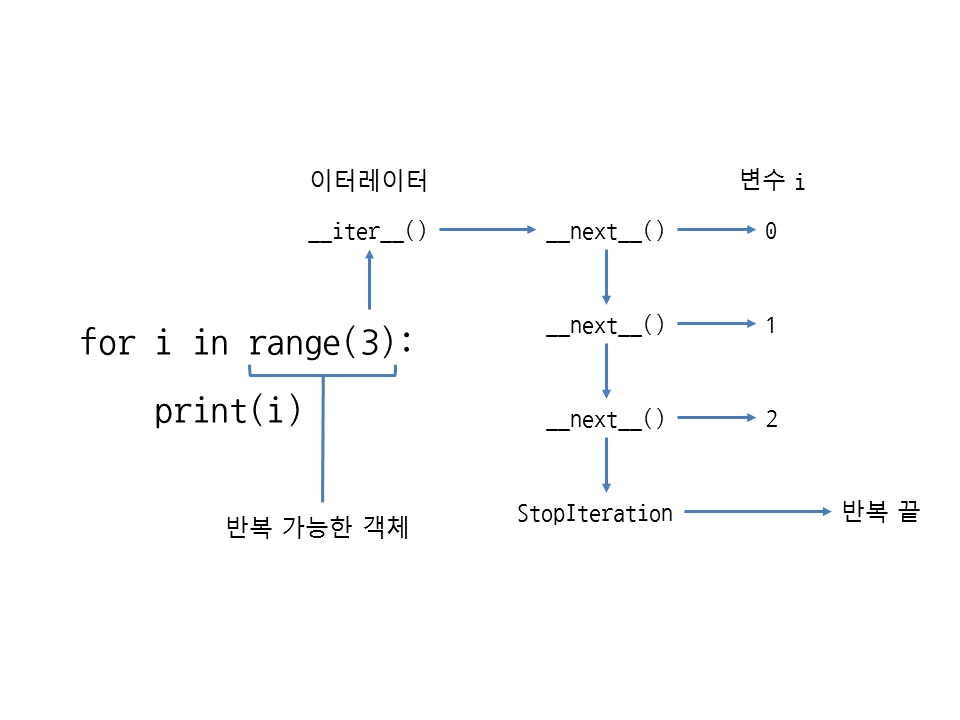

정리하자면 반복 가능한 객체는 요소를 한 번에 하나씩 가져올 수 있는 객체이고, 이터레이터는 __next__ 메서드를 사용해서 차례대로 값을 꺼낼 수 있는 객체입니다. 반복 가능한 객체(iterable)와 이터레이터(iterator)는 별개의 객체이므로 둘은 구분해야 합니다. 즉, 반복 가능한 객체에서 __iter__ 메서드로 이터레이터를 얻습니다.

## iterator 만들기
 __iter__, __next__ 메서드 활용


In [0]:
class Counter:
    def __init__(self,stop):
        self.current = 0
        self.stop = stop
    
    def __iter__(self):
        return self

    def __next__(self):
        if self.current < self.stop:
            r = self.current
            self.current += 1 
            return r
        else:
            raise StopIteration

In [0]:
for i in Counter(5):
    print(i , end = ' ')

0 1 2 3 4 

## 인덱스로 접근할 수 있는 iterator 만들기
 __getitem__ 메서드를 활용  
 클래스에서 __getitem__만 구현해도 이터레이터가 되며 __iter__, __next__는 생략해도 된다.  
 (초깃값이 없다면 __init__도 생략 가능)

In [0]:
class Counter:
    def __init__(self,stop):
        self.stop = stop
    def __getitem__(self,index):
        if index < self.stop:
            return index
        else:
            raise IndexError

In [0]:
Counter(3)[2]

2

## iter, next 
iter는 객체의 __iter__ 메서드를 호출해주고, next는 객체의 __next__ 메서드를 호출

In [0]:
it = iter(range(3))   # iterabel 객체인 range(3)의 __iter__ 메서드를 iter 함수로 호출해 iterator 생성

next(it)  # iterator it의 __next__ 메서드를 next 함수로 호출해 iterator에서 값을 차례로 꺼냄

0

## iter
  
**iter(호출가능한객체, 반복을끝낼값)**  
이 경우에는 반복 가능한 객체 대신 호출 가능한 객체(callable)를 넣어줘야함  
반복을 끝낼 값은 sentinel

Callable

1. 함수 
2. __call__ 이 있는 클래스 

__call__은 객체.( )으로 호출된다

In [0]:
import random

for i in iter(lambda : random.randint(0,5),2):   # 0 ~ 5 까지 난수발생하는 람다 표현식을 iterator로 만든 뒤
    print(i, end=' ')                            # next로 결과 값을 하나씩 꺼내다 2가 나오면 반복 종료


5 3 0 

## practice ??
https://dojang.io/mod/quiz/attempt.php?attempt=919318&cmid=2411

In [0]:
class TimeIterator():
    def __init__(self,start,stop):
        self.start = start
        self.stop = stop
    
    def __getitem__(self,index):
        if self.start/3600 < 24:
            if self.start < self.stop:
                hour = int(self.start/3600)
                minute = int(((self.start/3600) % hour)*60)
                sec = int(((((self.start/3600) % hour)*60) % minute) * 60)
                return hour, minute, sec
            else:
                raise Exception('끝나는 시점이 시작보다 앞섭니다')
        
        if self.start/3600 => 24:
            if self.start < self.stop:
                self.start 


# #40 Generator
제너레이터는 이터레이터를 생성해주는 함수입니다.  
이터레이터는 클래스에 __iter__, __next__ 또는 __getitem__ 메서드를 구현해야 하지만 제너레이터는 함수 안에서 yield라는 키워드만 사용하면 끝.  
 그래서 제너레이터는 이터레이터보다 훨씬 간단하게 작성할 수 있습니다.

## yield

In [4]:
def number_generator():
    yield 0
    yield 1
    yield 2

for i in number_generator():
    print(i)

0
1
2


In [5]:
dir(number_generator())

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

제너레이터는 제너레이터 객체에서 __next__ 메서드를 호출할 때마다 함수 안의 yield까지 코드를 실행하며 yield에서 값을 발생시킵니다(generate).

In [11]:
def number_generator():
    yield 0
    yield 1
    yield 2

g = number_generator() # generator 객체(g)
a = iter(g) # generator에서 iter 메서드를 호출하면 자기 자신을 반환 즉 a = g


b = next(g)
print(b)

c = next(g)
print(c)

d = next(g)
print(d)

0
1
2


## 제너레이터 만들기

In [12]:
def number_generator(stop):
    n = 0
    while n < stop:
        yield n
        n += 1

for i in number_generator(3):
    print(i)

0
1
2


In [13]:
def upper_generator(x):
    for i in x:
        yield i.upper()   # yield는 반환값을 함수 바깥으로 전달하고 함수는 일시정지 
                          # .upper()와 같이 함수도 호출 가능

name = ['hyun Lee','ura son']

for i in upper_generator(name):
    print(i)

HYUN LEE
URA SON


## yield from

In [15]:
def number_generator():
    x = [1,2,3]
    yield from x      # yield from 뒤에는 iterable, iterator, generator object가 올 수 있음
                      # 여기선 리스트니까 iterable
for i in number_generator():
    print(i)

1
2
3


In [19]:
def number_generator(stop):
    n = 0
    while n < stop:
        yield n 
        n += 1

def five_generator():
    yield from number_generator(5) # yield from 뒤에 generator object가 온 경우

for i in five_generator():
    print(i , end= ' ')

0 1 2 3 4 

## 제너레이터 표현식

In [20]:
[i for i in range(30) if i % 2 == 0]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [24]:
(i for i in range(50) if i % 2 ==0)

<generator object <genexpr> at 0x7f1fd636d518>

## practice 소수 제너레이터 만들기

In [0]:
def prime_number_generator(start, stop):
    if 10<=start<=1000 and 100<=stop<=1000 and start < stop:
        a = range(start, stop+1)
        for i in a:
            for j in range(start):
                if i % j == 0:




    else:
        raise Exception('범위내의 숫자를 입력해주세요')